In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [4]:
X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_COPD")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_COPD")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_COPD")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_COPD")
X_train.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,19061001102,7.675790,41.308712,0.238955,22.002295,0.270613,206.808298,0.304035,0.268852,1.043339,0.560035,-0.351666
1,27015960600,6.294374,40.220123,0.110106,18.973409,0.227570,69.714908,0.598836,0.013274,0.604208,0.046160,-0.434057
2,36047017100,8.689179,40.157880,2.029418,42.893829,0.744788,3197.930125,0.825212,0.348693,0.280226,107.436218,-0.434061
3,26099224500,9.080132,44.116969,0.451251,28.786964,0.349434,658.197961,0.040913,0.143559,0.111026,0.850032,-0.434061
4,41059950200,9.457754,46.477580,0.083931,21.090690,0.290217,243.038025,0.443595,0.016256,0.077002,0.064230,-0.434061


In [5]:
X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract", inplace=True)

In [6]:
print(X_test.shape, y_test.shape, y_train.shape)

(18081, 11) (18081, 2) (54242, 2)


In [7]:
y_test.head()


,CensusTract,COPD_prevalence
0,48251130210,7.3
1,22069000400,9.5
2,39105964600,12.4
3,32003004602,10.9
4,42101007900,3.9


In [8]:
y_test.set_index("CensusTract", inplace=True)
y_train.set_index("CensusTract", inplace=True)

In [9]:
y_test = np.array(y_test)
y_test = y_test.reshape(18081,)
y_train = np.array(y_train)
y_train = y_train.reshape(54242,)
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)


(54242, 11) (18081, 11) (18081,) (54242,)


In [10]:
X_test.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
48251130210,9.107989,45.878020,0.245880,31.293715,0.408591,81.736219,0.068799,0.025965,0.187365,0.182960,0.000021
22069000400,9.218425,35.443146,0.212973,40.289872,0.596499,177.486754,0.148310,0.021718,0.357363,0.026640,0.000169
39105964600,8.538189,41.798904,0.234670,28.832846,0.364220,4.962306,0.300045,0.103550,0.288699,0.172542,0.129253
32003004602,7.346402,55.513488,0.703794,40.467171,0.606575,347.524384,0.060020,0.004481,1.727927,5.163652,0.000194
42101007900,9.507961,44.269933,0.737931,36.641995,0.477338,382.720756,0.826435,0.120161,0.924759,5.161382,581.032916


### In the EDA notebook, I have already done multiple OLS on the data and found no reasonable correlation.

In [20]:
# Instantiating RandomForestRegressor with default values

rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
y_pred = rf.predict(X_test)

In [22]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5676305113348427
MAE: 1.2597703666832587
MSE: 2.9698158635031247
RMSE: 1.7233153697170824


### This R<sup>2</sup> score is mediocre. Tuning hyperparameters next.

In [19]:
# Instantiate RandomForestRegressor and using randomized search for best hyperparameters n_estimators and max_depth

rf = RandomForestRegressor() 
params = {"n_estimators": range(1,500), "max_depth":range(1,30)}

rs = RandomizedSearchCV(rf, params)

In [20]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': range(1, 500)})

In [21]:
rs.best_estimator_

RandomForestRegressor(max_depth=27, n_estimators=409)

In [23]:
y_pred = rs.predict(X_test)

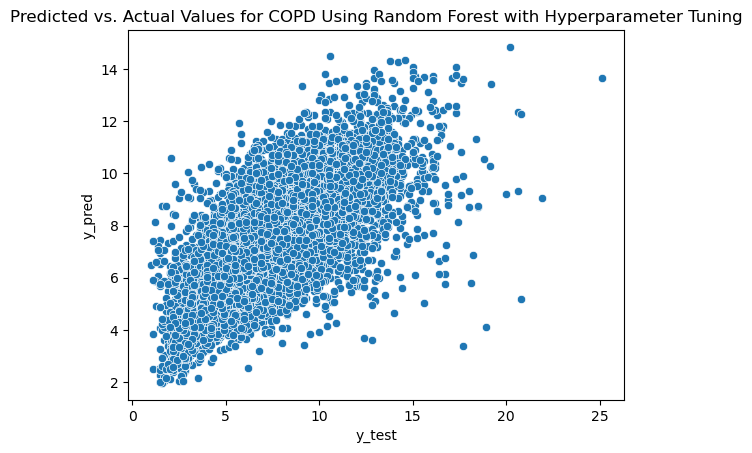

In [24]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using Random Forest with Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [25]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5713534786101935
MAE: 1.2541828926434615
MSE: 2.9442439219959327
RMSE: 1.7158799264505464


In [9]:
opt = BayesSearchCV(RandomForestRegressor(), {"n_estimators":Integer(1,500), "max_depth":Integer(1,30)})
_ = opt.fit(X_train, y_train)

In [11]:
opt.best_estimator_

RandomForestRegressor(max_depth=30, n_estimators=409)

In [13]:
y_pred = opt.predict(X_test)

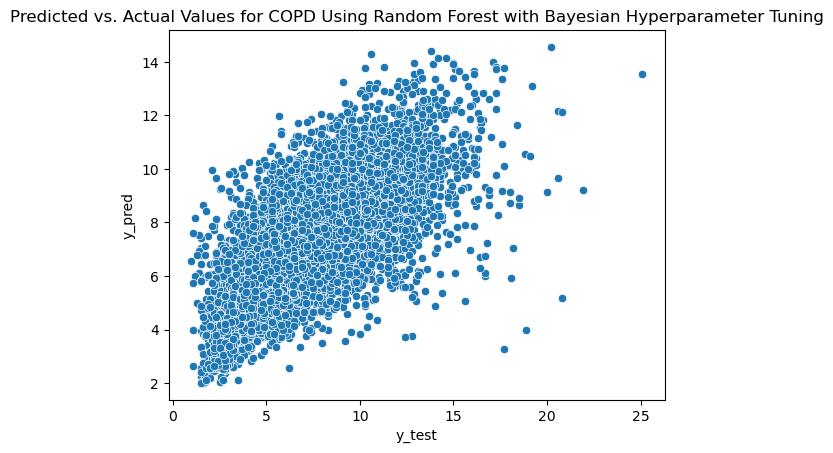

In [14]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using Random Forest with Bayesian Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [15]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.57079528774005
MAE: 1.256476471090564
MSE: 2.948077967053397
RMSE: 1.7169967871412564


### This model is not quite as good as the random forest one using hyperparameters optimized by randomized searching.

In [87]:
# Instantiating AdaBoostRegressor with default parameters

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [88]:
y_pred = ada.predict(X_test)

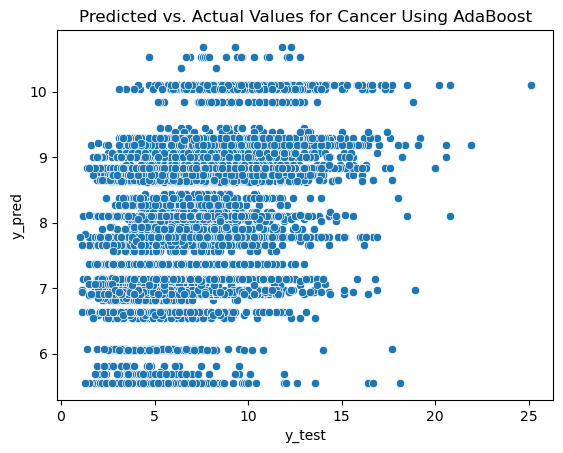

In [89]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Cancer Using AdaBoost")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [90]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.01651763191040767
MAE: 2.184422833976088
MSE: 6.982153616107916
RMSE: 2.6423765091500333


### Since Adaboost with the default hyperparameters is not giving reasonable results, the next step will be to search for the best hyperparameters.

In [91]:
# Instantiating AdaBoost Regressor and randomly searching for best hyperparameters n_estimators and learning rate

ada = AdaBoostRegressor()
params = {"n_estimators": range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [92]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15455e5e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15454cc40>})

In [93]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=97.4842609938711, n_estimators=381)

In [95]:
y_pred = rs.predict(X_test)

In [96]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -5.4736150066809595
MAE: 6.131607765057198
MSE: 44.4653127592495
RMSE: 6.668231606599272


### Changing the parameters made the results worse. 

In [97]:
# Instantiating GradientBoostRegressor with default parameters

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [98]:
y_pred = gb.predict(X_test)

In [99]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.401054499167933
MAE: 1.518783397443503
MSE: 4.113976347490216
RMSE: 2.0282939499713093


In [100]:
# Instantiating GradientBoost and using randomized searching for best hyperparameters n_estimators and learning rate

gb = GradientBoostingRegressor()
params = {"n_estimators": range(1,500), "max_leaf_nodes": range(2,100), "learning_rate": np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [101]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1576c13a0>,
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]})

In [102]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.2780678795383295, max_leaf_nodes=10,
                          n_estimators=200)

In [104]:
y_pred = rs.predict(X_test)

In [105]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4771062598368315
MAE: 1.4041149078892308
MSE: 3.5915996969565995
RMSE: 1.8951516290145756


### This is still not as good as Random Forest. 

In [106]:
# Instantiating XGBoost with default parameters

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
y_pred = xgb.predict(X_test)

In [57]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5414594699458484
MAE: 1.303031118163611
MSE: 3.1495768686595818
RMSE: 1.7747047271756453


### This is still not as good as Random Forest.

In [58]:
# Instantiating XGBRegressor Regressor and randomly searching for best hyperparameters max_depth, min_child_weight, and gamma.
xgb = XGBRegressor()
params = {"max_depth": range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [59]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x153db6820>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x153db6af0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x153dcb400>})

In [60]:
rs.best_params_

{'gamma': 24, 'max_depth': 57, 'min_child_weight': 190}

In [62]:
y_pred = rs.predict(X_test)

In [63]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5673445519018292
MAE: 1.2626119672273035
MSE: 2.971780032767481
RMSE: 1.7238851564902695


This is slightly better than XGBoost without tuning the hyperparameters, but it is still not as good as Random Forest. 

In [24]:
opt = BayesSearchCV(XGBRegressor(), {"max_depth":Integer(1,200), "min_child_weight":Integer(1,200), "gamma":Integer(1,200)})
_ = opt.fit(X_train, y_train)

In [25]:
opt.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=12, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=48, max_leaves=None,
             min_child_weight=163, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
y_pred = opt.predict(X_test)

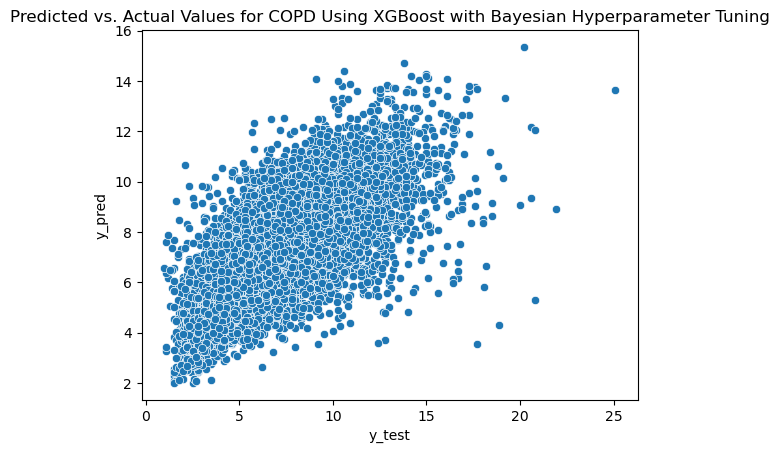

In [28]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using XGBoost with Bayesian Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [29]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5676305113348427
MAE: 1.2597703666832587
MSE: 2.9698158635031247
RMSE: 1.7233153697170824


### This is about the same as using the hyperparameters tuned via randomized search 

In [16]:
# Instantiating LGBMRegressor and randomly searching for best hyperparameters reg_alpha and reg_lambda

lgbm = ltb.LGBMRegressor()
params = {"reg_alpha": np.arange(1e-3,100), "reg_lambda": np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [24]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2...
       6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01])})

In [25]:
y_pred = rs.predict(X_test)

In [26]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.49351588824148884
MAE: 1.3890231242060016
MSE: 3.478886899157669
RMSE: 1.8651774444158575


In [20]:
rs.best_estimator_

LGBMRegressor(reg_alpha=12.000999999999998, reg_lambda=49.00099999999999)

In [31]:
# Instantiating Bayesian search using LightGBM 

opt = BayesSearchCV(ltb.LGBMRegressor(), {"reg_alpha": Real(1e-3,100), "reg_lambda": Real(1e-3,100)})
_ = opt.fit(X_train, y_train)

/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The obj

In [32]:
y_pred = opt.predict(X_test)

In [33]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.49828375233689826
MAE: 1.3835621658011679
MSE: 3.446137875933832
RMSE: 1.856377622126983


In [34]:
opt.best_estimator_

LGBMRegressor(reg_alpha=0.3554474514775055, reg_lambda=1.4383866603546833)

### Not as good as the previous model. 

In [107]:
# Importing normalized data

X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_CHD")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_CHD")
y_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_CHD")
y_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_CHD")
X_train_log.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,32003002961,7.020828,55.534960,0.917367,0.287083,0.530685,0.344931,-1.293792,-1.380519,0.247426,0.507938
1,18097310204,9.312653,44.314528,0.839156,-0.128422,-0.115502,0.054532,-1.041797,0.462086,1.963273,0.927542
2,48453001308,9.493040,41.367930,0.615746,0.371394,0.170443,1.201532,-0.211880,-1.151121,0.588443,0.592208
3,15009030301,0.000000,0.000000,-2.295210,-3.831500,-3.047175,-1.148260,-0.453107,-1.367256,0.178587,-0.916296
4,6111000200,8.453749,57.221836,-1.199415,0.155523,0.384052,0.125365,0.366184,0.416839,0.400620,-1.252648


In [108]:
# Instantiating support vector machine regressor and randomly searching for best hyperparameters C and epsilon.

svm = SVR()
params = {"C": np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [109]:
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1576f2e20>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1576f7850>})

In [110]:
svm_rs.best_estimator_

SVR(C=5.150003902430793, epsilon=2.184783042590056)

In [111]:
# Instantiating support vector machine regressor using best hyperparameters from randomized search

svm = SVR(C=5.150003902430793, epsilon=2.184783042590056)
svm.fit(X_train, y_train)

SVR(C=5.150003902430793, epsilon=2.184783042590056)

In [112]:
y_pred = svm_rs.predict(X_test)

In [113]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.08258713669206963
MAE: 1.9515985093024741
MSE: 6.301432793616258
RMSE: 2.510265482696254


### The R<sup>2</sup> score indicates that SVM regression is not a good model for this data.

## Random forest with hyperparameter tuning gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for random forest to be a reasonable model.